/var/folders/h9/t_5ml32n67x_kgbhymld0b580000gn/T/ipykernel_34328/750214975.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['longitude'] = boston_df['longitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))
/var/folders/h9/t_5ml32n67x_kgbhymld0b580000gn/T/ipykernel_34328/750214975.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['latitude'] = boston_df['latitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))
/var/folders/h9/t_

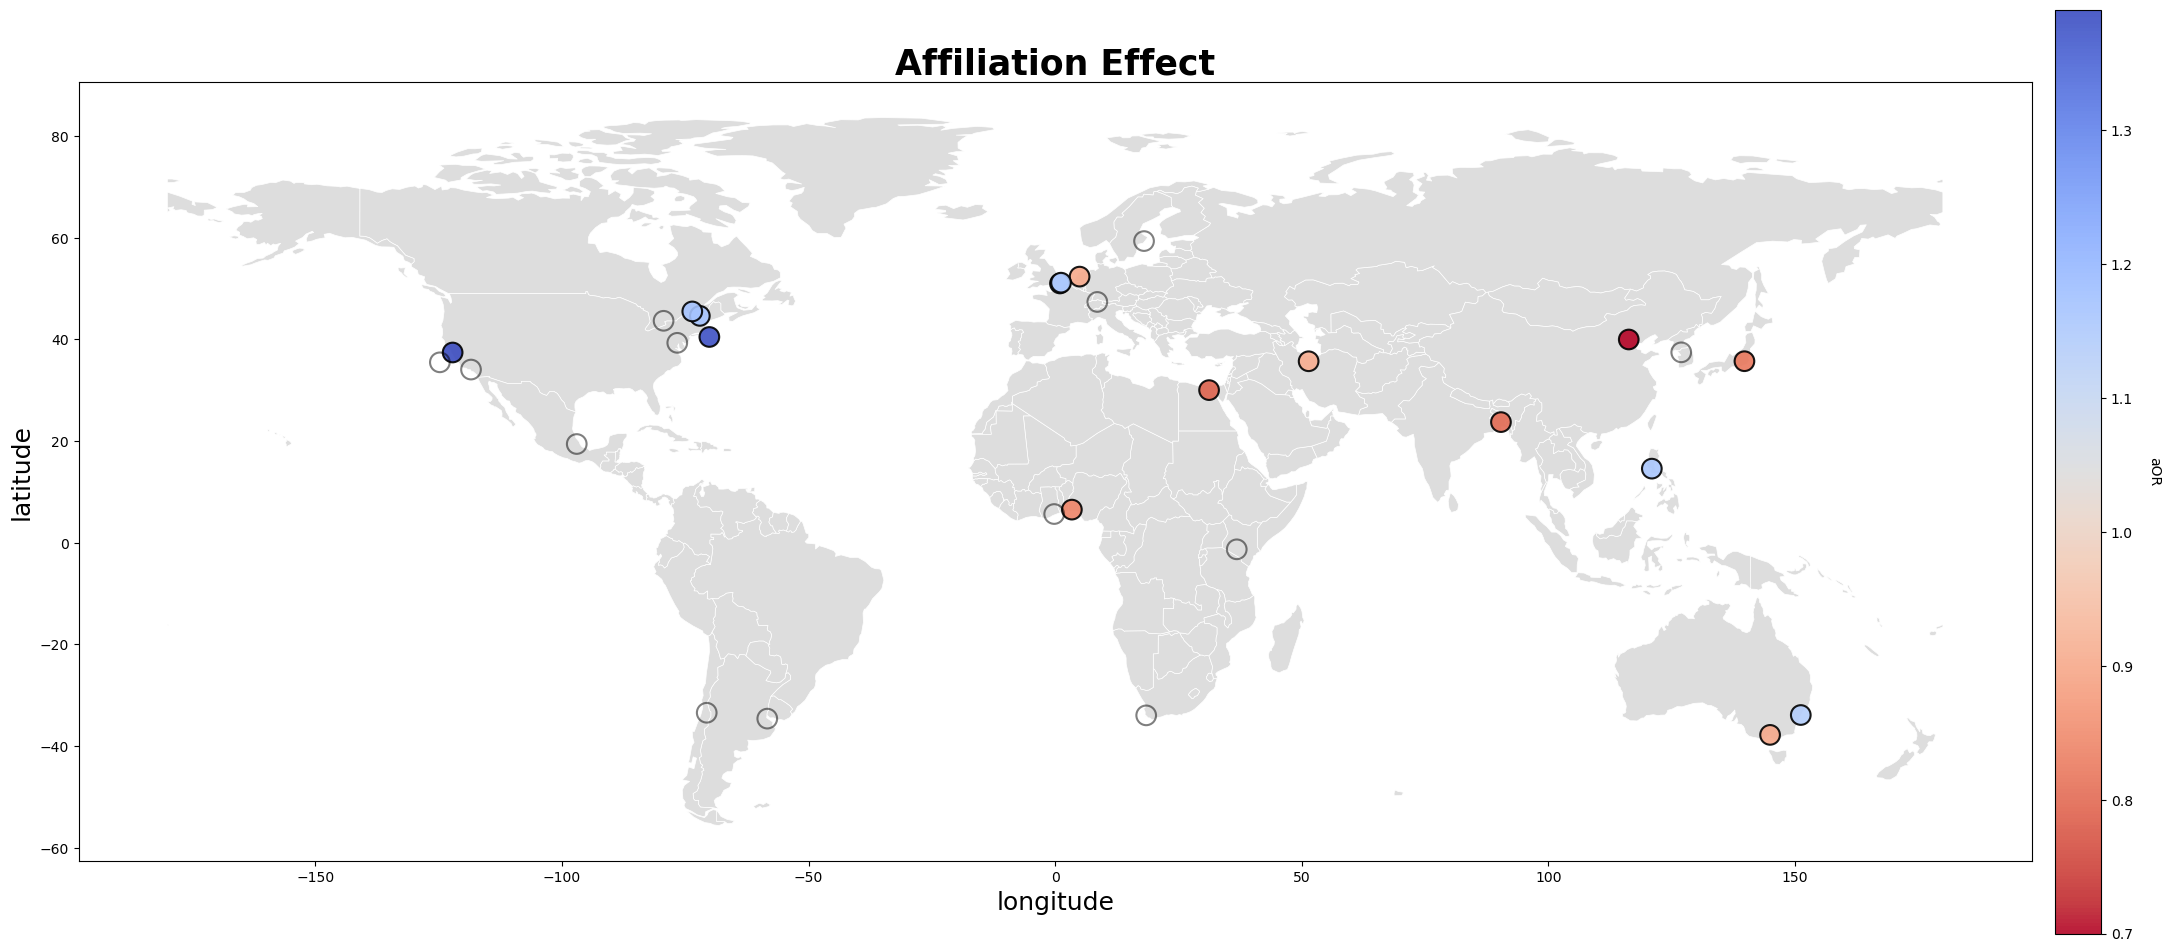

                                         aff_num   aOR    P>z  sig   
0                               Cairo University  0.79  0.000    1  \
1                         Harvard Medical School  1.17  0.000    1   
2                       Johns Hopkins University  0.93  0.114    0   
3                           Karolinska Institute  0.97  0.463    0   
4                           Kings College London  1.19  0.000    1   
5    Massachusetts Institute of Technology (MIT)  1.38  0.000    1   
6                              McGill University  1.17  0.000    1   
7                              Peking University  0.70  0.000    1   
8                      Seoul National University  1.03  0.514    0   
9                            Stanford University  1.39  0.000    1   
10     Universidad Nacional AutÃ³noma de MÃ©xico  0.98  0.623    0   
11                   Universidad de Buenos Aires  1.04  0.408    0   
12                          Universidad de Chile  1.03  0.581    0   
13                  

In [1]:
# Create map based on affiliationbias data

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('analysed_data/affiliation_with_geocode.csv', sep=';')

# Identify the index of the 'University of Sydney'
sydney_index = df[df['aff_num'] == 'University of Sydney'].index

# Set the latitude and longitude for the 'University of Sydney'
df.loc[sydney_index, 'latitude'] = -33.889
df.loc[sydney_index, 'longitude'] = 151.188

# Identify the index of the 'University of Cambridge'
cambridge_index = df[df['aff_num'] == 'University of Cambridge'].index

# Set the latitude and longitude for the 'University of Cambridge'
df.loc[cambridge_index, 'latitude'] = 52.2043
df.loc[cambridge_index, 'longitude'] = 0.1149

# Convert 'aOR' values from strings to numbers
df['aOR'] = df['aOR'].str.replace(',', '.').astype(float)

# Filter out rows with non-numeric 'aOR' values
df = df.dropna(subset=['aOR'])

# Apply jitter to longitude and latitude only in Boston and UK areas
jitter_boston = 2.4  # Adjust this to add more or less jittering
jitter_uk = 1.2 # Adjust this to add more or less jittering
jitter_sf = 2.4  # Adjust this to add more or less jittering

# Jitter Boston area
boston_df = df[(df['latitude'] > 42.3) & (df['latitude'] < 42.4) & (df['longitude'] > -71.2) & (df['longitude'] < -70.9)]
boston_df['longitude'] = boston_df['longitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))
boston_df['latitude'] = boston_df['latitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))

# Jitter UK area
uk_df = df[(df['latitude'] > 50) & (df['latitude'] < 59) & (df['longitude'] > -10) & (df['longitude'] < 2)]
uk_df['longitude'] = uk_df['longitude'] + np.random.uniform(-jitter_uk, jitter_uk, size=len(uk_df))
uk_df['latitude'] = uk_df['latitude'] + np.random.uniform(-jitter_uk, jitter_uk, size=len(uk_df))

# Jitter San Francisco area
sf_df = df[(df['latitude'] > 37.5) & (df['latitude'] < 37.9) & (df['longitude'] > -123.1) & (df['longitude'] < -122.35)]
sf_df['longitude'] = sf_df['longitude'] + np.random.uniform(-jitter_sf, jitter_sf, size=len(sf_df))
sf_df['latitude'] = sf_df['latitude'] + np.random.uniform(-jitter_sf, jitter_sf, size=len(sf_df))

# Replace the rows in the original dataframe with the jittered rows
df.update(boston_df)
df.update(uk_df)
df.update(sf_df)

# Create a GeoDataFrame from the data
df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the plot with specified size
fig, ax = plt.subplots(figsize=(30, 20))

# Add the world map to the plot excluding Antarctica
world[world['continent'] != 'Antarctica'].plot(ax=ax, color='#DDDDDD', edgecolor='#FFFFFF', linewidth=0.5)

# Separate dataframe into sig = 1 and sig = 0
df_sig1 = df[df['sig'] == 1]
df_sig0 = df[df['sig'] == 0]

# Add the points to the plot with different markers, larger size, and alpha for transparency
scatter_sig1 = ax.scatter(df_sig1['longitude'], df_sig1['latitude'], c=df_sig1['aOR'], edgecolor='black', linewidth=1.5, s=200, alpha=0.9, cmap='coolwarm_r')
scatter_sig0 = ax.scatter(df_sig0['longitude'], df_sig0['latitude'], color='none', edgecolor='black', linewidth=1.5, s=200, alpha=0.5)

# Add title and labels
ax.set_title('Affiliation Effect', fontdict={'fontsize': 25, 'fontweight': 'bold'})
ax.set_xlabel('longitude', fontdict={'fontsize': 18})
ax.set_ylabel('latitude', fontdict={'fontsize': 18})

# Add a colorbar
cbar = fig.colorbar(scatter_sig1, ax=ax, orientation='vertical', pad=0.01, shrink=0.6)
cbar.set_label('aOR', rotation=270, labelpad=20)

# Show the plot
plt.show()


print(df)
